In [ ]:
# https://stackoverflow.com/questions/46790390/how-to-read-a-large-json-in-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

In [18]:
%matplotlib inline

import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import json

In [4]:
df_review = pd.read_json('review-sample-100k.json', lines = True)

In [85]:
rating = df_review['stars'].value_counts().sort_index()
rating_pct = 100.0*rating/sum(rating)
# list(rating_pct.index)
rating_pct.values

array([ 13.267,   8.309,  11.807,  23.897,  42.72 ])

# PLOT 2

In [49]:
# Count number of words for each review
df_review['word_count'] = df_review['text'].apply(lambda x: len(x.split()))

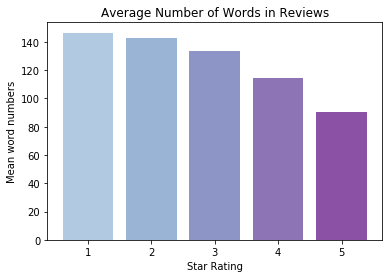

In [114]:
# Now plot!
colors = plt.cm.BuPu(np.linspace(0.3,0.7,len(rating_pct))) # use pretty colorspace
plot2 = plt.bar(word_by_rating.index, word_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean word numbers')
plt.title('Average Number of Words in Reviews')

In [115]:
import statsmodels.api as sm
x = df_review['stars']
y = df_review['word_count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit() #least square model
model.summary()
#Beta0, Beta1 = model.params

/Users/liupei-pei/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             word_count   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4433.
Date:                Sun, 29 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:03:51   Log-Likelihood:            -6.0473e+05
No. Observations:              100000   AIC:                         1.209e+06
Df Residuals:                   99998   BIC:                         1.209e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.8550      0.915    185.675      0.000     168.062     171.648
stars        -15.2120      0.228    -66.580      0.000     -15.660     -14.764
==============================================================================
Omnibus:                    55242.360   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532432.700
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      13.124   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

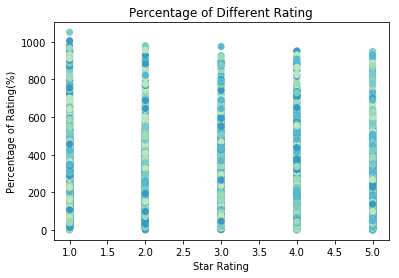

In [117]:
colors = plt.cm.GnBu(np.linspace(0.3,0.7,len(rating_pct)))
plot3 = plt.scatter(df_review['stars'], df_review['word_count'], color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Percentage of Rating(%)')
plt.title('Percentage of Different Rating')